<a href="https://colab.research.google.com/github/jinheehong96/test/blob/main/%5Bproject3%5Dmbart_cc25_(big%2Bai_hub).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install transformers

##wandb

In [ ]:
# Installing transformer

!pip install -q transformers
!pip install -q sentencepiece

In [ ]:
!pip install wandb 
!wandb login

In [ ]:
!wandb.init('mbart-small_data')

/bin/bash: -c: line 0: syntax error near unexpected token `'mbart-small_data''
/bin/bash: -c: line 0: `wandb.init('mbart-small_data')'


##Ai hub 데이터 추가

In [ ]:
import pandas as pd

f_path='/content/drive/MyDrive/01.NLP_class/project3_NMT/data/'
ai_hub1=pd.read_csv(f_path+'translated_ai_hub_end_30000.csv').dropna(axis=0) ##파일 이름 변경
ai_hub2=pd.read_csv(f_path+'translated_ai_start_70000.csv')

ai_hub=pd.concat([ai_hub1,ai_hub2],ignore_index=True)
ai_sid=[]
for i in range(len(ai_hub)):
  ai_sid.append('ai_hub'+str(i))
ai_hub['sid']=ai_sid

print('ai hub1 data:', len(ai_hub1))
print('ai hub2 data:', len(ai_hub2))
print('Total ai hub data: ', len(ai_hub))

ai_hub_train=ai_hub[:84001]
ai_hub_dev=ai_hub[84001:]

print('ai hub train data: ',len(ai_hub_train))
print('ai hub dev data: ',len(ai_hub_dev))


ai hub1 data: 30000
ai hub2 data: 70100
Total ai hub data:  100100
ai hub train data:  84001
ai hub dev data:  16099


In [ ]:
##AI HUB Data READ

from matplotlib import pyplot as plt
from typing import List, Tuple, Dict
import pandas as pd

DATAMAP = {'train':'train.csv', 'dev':'dev.csv', 'test1':'test.csv','test2':'test2.csv'}

def read_aihub(df)->List[Dict[str,str]]:
  sid=df['sid'].to_list()
  src = df['en'].to_list() #source가 영어를 의미함
  if 'ko' in df:
    tgt = df['ko'].to_list()
    return {'sid':sid, 'src':src, 'tgt':tgt}

hub_train_data=read_aihub(ai_hub_train)
hub_dev_data=read_aihub(ai_hub_dev)
#print(hub_train_data)
print(len(hub_train_data['sid']))
print(len(hub_dev_data['tgt']))

84001
16099


In [ ]:
from matplotlib import pyplot as plt
from typing import List, Tuple, Dict
import pandas as pd

DATAMAP = {'train':'train.csv', 'dev':'dev.csv', 'test1':'test.csv','test2':'test2.csv'}

def read_csv(fname:str)->List[Dict[str,str]]:
  df = pd.read_csv(fname)
  #print(len(df)*0.01)
  #size=int(len(df)*0.1)
  #size=int(len(df)*0.01)
  sid = df['sid'].to_list()
  src = df['en'].to_list() #source가 영어를 의미함
  if 'ko' in df:
    tgt = df['ko'].to_list()
    assert len(sid) == len(src) == len(tgt)
    return {'sid':sid, 'src':src, 'tgt':tgt}
  else:
    assert len(sid) == len(src)
    return {'sid': sid, 'src': src}

f_path='/content/drive/MyDrive/01.NLP_class/project3_NMT/data/'
train_data = read_csv(f_path+DATAMAP['train'])
dev_data = read_csv(f_path+DATAMAP['dev'])
test1_data = read_csv(f_path+DATAMAP['test1'])
test2_data = read_csv(f_path+DATAMAP['test2'])

print(f"학습 데이터 개수: {len(train_data['sid'])}")
print(f"검증 데이터 개수: {len(dev_data['sid'])}")
print(f" 첫번째 평가 데이터 개수: {len(test1_data['sid'])}")
print(f"두 번째 평가 데이터 개수: {len(test2_data['sid'])}")

학습 데이터 개수: 150000
검증 데이터 개수: 10000
 첫번째 평가 데이터 개수: 10000
두 번째 평가 데이터 개수: 10000


In [ ]:
print(hub_train_data.keys())
print(dev_data)

dict_keys(['sid', 'src', 'tgt'])
{'sid': ['dev-0', 'dev-1', 'dev-2', 'dev-3', 'dev-4', 'dev-5', 'dev-6', 'dev-7', 'dev-8', 'dev-9', 'dev-10', 'dev-11', 'dev-12', 'dev-13', 'dev-14', 'dev-15', 'dev-16', 'dev-17', 'dev-18', 'dev-19', 'dev-20', 'dev-21', 'dev-22', 'dev-23', 'dev-24', 'dev-25', 'dev-26', 'dev-27', 'dev-28', 'dev-29', 'dev-30', 'dev-31', 'dev-32', 'dev-33', 'dev-34', 'dev-35', 'dev-36', 'dev-37', 'dev-38', 'dev-39', 'dev-40', 'dev-41', 'dev-42', 'dev-43', 'dev-44', 'dev-45', 'dev-46', 'dev-47', 'dev-48', 'dev-49', 'dev-50', 'dev-51', 'dev-52', 'dev-53', 'dev-54', 'dev-55', 'dev-56', 'dev-57', 'dev-58', 'dev-59', 'dev-60', 'dev-61', 'dev-62', 'dev-63', 'dev-64', 'dev-65', 'dev-66', 'dev-67', 'dev-68', 'dev-69', 'dev-70', 'dev-71', 'dev-72', 'dev-73', 'dev-74', 'dev-75', 'dev-76', 'dev-77', 'dev-78', 'dev-79', 'dev-80', 'dev-81', 'dev-82', 'dev-83', 'dev-84', 'dev-85', 'dev-86', 'dev-87', 'dev-88', 'dev-89', 'dev-90', 'dev-91', 'dev-92', 'dev-93', 'dev-94', 'dev-95', 'dev-96'

In [ ]:
def merge_dict(hub_data, ori_data):
  ori_data['src']+=(hub_data['src'])
  ori_data['sid']+=(hub_data['sid'])
  ori_data['tgt']+=(hub_data['tgt'])
  return(ori_data)

train_data=merge_dict(hub_train_data, train_data)
dev_data=merge_dict(hub_dev_data, dev_data)

print('total train data:',len(train_data['sid']))
print('total dev data:', len(dev_data['sid'])) 

total train data: 234001
total dev data: 26099


# TRAIN START !!

> 1. Eng -> Kor 번역 모델 구현

> 2. 데이터 전처리, dataset class 구현

> 3. 모델 학습, 평가 후 저장 and test 적용

#토크나이징

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from transformers import MBartTokenizer
from collections import defaultdict
from transformers import MBartForConditionalGeneration, MBart50TokenizerFast

tokenizer = AutoTokenizer.from_pretrained("facebook/mbart-large-cc25",src_lang="en_XX", tgt_lang="ko_KR")

def tokenize(sample):
  src_inputs = tokenizer(sample['src'], padding=True)
  src_inputs['src_input_ids'] = src_inputs.pop('input_ids')
  src_inputs['src_attention_mask'] = src_inputs.pop('attention_mask')
  print(src_inputs)
  
  with tokenizer.as_target_tokenizer():
    tgt_inputs = tokenizer(sample['tgt'], padding=True)
    tgt_inputs['tgt_input_ids'] = tgt_inputs.pop('input_ids')
    tgt_inputs['tgt_attention_mask'] = tgt_inputs.pop('attention_mask')

        
    print('tgt_input_ids :', tgt_inputs['tgt_input_ids'])
  tokenized_train=dict(src_inputs, **tgt_inputs)
  print(tokenized_train.keys())

  return(tokenized_train)

tokenized_train=tokenize(train_data)
tokenized_dev=tokenize(dev_data)

Downloading:   0%|          | 0.00/1.16k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.83M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/8.68M [00:00<?, ?B/s]

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[[6, 120245, 1083, 13068, 240229, 33004, 713, 40987, 7901, 6050, 18692, 3659, 14883, 341, 6, 86159, 2171, 128495, 6050, 25354, 190278, 5, 2, 250014, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [9450, 51415, 15990, 469, 124601, 6888, 3614, 3626, 1963, 118548, 177365, 5, 2, 250014, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [66244, 98706, 33241, 6, 108776, 11270, 123011, 6, 249922, 16367, 5, 2, 250014, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [126061, 39025, 19243, 993, 10454, 164616, 5, 2, 250014, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [146802, 2625, 66082, 413, 116932, 9913, 29800, 6668, 13187, 48331, 32, 2, 250014, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

##tgt_label

In [ ]:
li=[]
for i in range(len(tokenized_train['tgt_input_ids'])):
    a=[]
    for k in range(len(tokenized_train['tgt_input_ids'][i])):
        if tokenized_train['tgt_input_ids'][i][k]==1 :
            a.append(-100)
        else:
            a.append(tokenized_train['tgt_input_ids'][i][k])
    a.append(-100)
    li.append(a)
print(li)

In [ ]:
tokenized_train.update({'tgt_label':li})

In [ ]:
li=[]
for i in range(len(tokenized_dev['tgt_input_ids'])):
    a=[]
    for k in range(len(tokenized_dev['tgt_input_ids'][i])):
        if tokenized_dev['tgt_input_ids'][i][k]==1 :
            a.append(-100)
        else:
            a.append(tokenized_dev['tgt_input_ids'][i][k])
    a.append(-100)
    li.append(a)
print(li)

In [ ]:
tokenized_dev.update({'tgt_label':li})

In [ ]:
print(tokenized_train['src_input_ids'][:10])
print(tokenized_train['src_attention_mask'][:10])
print(tokenized_train['tgt_input_ids'][:10])
print(tokenized_train['tgt_attention_mask'][:10],end='\n')

print(tokenized_train['tgt_label'][:10])

[[9563, 4527, 10, 16777, 147, 2729, 53, 6056, 64457, 5, 2, 250004, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [87, 7228, 10, 59671, 939, 9, 13, 22553, 18925, 5, 2, 250004, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [87, 17569, 70, 20428, 509, 3017, 214, 5, 2, 250004, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [2583, 831, 22113, 69232, 99, 2499, 4343, 450, 8, 16765, 678, 15381, 55769, 5, 2, 250004, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
for i,data in enumerate(tokenized_train.items()):
  print(data)
  if i ==1:
    break

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



#Dataloader

In [ ]:
#Dataloader
import torch

class Dataset(torch.utils.data.Dataset):
    def __init__(self, encodings):
        self.encodings = encodings

    def __getitem__(self, idx):
        return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}

    def __len__(self):
        return len(self.encodings['src_input_ids'])
#TRAIN
train_dataset = Dataset(tokenized_train)

#VALID
dev_dataset = Dataset(tokenized_dev)


In [ ]:
from torch.utils.data import DataLoader, Dataset
from transformers import  AdamW

epochs = 2
batch_size = 128
accumulation = 32 

train_loader = DataLoader(train_dataset, batch_size=batch_size//accumulation,shuffle=True)

dev_loader = DataLoader(dev_dataset, batch_size=batch_size//accumulation,shuffle=True)


In [ ]:
for i,data in enumerate(train_loader):
    print(data)
    if i == 0:
      break

In [ ]:
for i,data in enumerate(dev_loader):
    print(data)
    if i == 0:
      break

##Dataloader & Hyperparameter

In [ ]:
print(model.config)

#Modeling 학습 부분

In [ ]:
import gc
import torch
gc.collect()
torch.cuda.empty_cache()

In [ ]:
from transformers import MBartForConditionalGeneration, MBart50TokenizerFast

model = AutoModelForSeq2SeqLM.from_pretrained("facebook/mbart-large-cc25")
model.cuda()
optimizer = AdamW(model.parameters(), lr=3e-5)


Downloading:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


##수정전

In [ ]:

for epoch in range(config.epoch):
    model.train()
    print("Epoch {} begin".format(epoch))
    for batch in tqdm(train_dataloader):
        batch = {k:v.to(device) for k,v in batch.items()}
        output = model(input_ids=batch['src_ids'], attention_mask=batch['src_mask'],decoder_input_ids=batch['tgt_ids'],decoder_attention_mask=batch['tgt_mask'],labels=batch['tgt_label_ids'])
        # TODO: Gradient accumulation을 통해 큰 batch size를 활용하는 효과를 줄 수 있습니다.
        print(output.loss)
        output.loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), config.grad_clip_norm)
        optimizer.step()
        optimizer.zero_grad()
    
    model.eval()
    loss_list = []
    for batch in tqdm(dev_dataloader):
        batch = {k:v.to(device) for k,v in batch.items()}
        with torch.no_grad():
            output = model(input_ids=batch['src_ids'], attention_mask=batch['src_mask'],decoder_input_ids=batch['tgt_ids'],decoder_attention_mask=batch['tgt_mask'],labels=batch['tgt_label_ids'])
        loss_list.append(output.loss.item())
    print("Dev loss after {} epoch: {}".format(epoch+1, mean(loss_list)))
    
    model.save_pretrained(model_save_dir+'/model.epoch{}'.format(epoch))

##수정후2

In [ ]:
import gc
import torch
gc.collect()
torch.cuda.empty_cache()

In [ ]:
import os
from statistics import mean
from tqdm import tqdm

import torch.nn.functional as F
from torch.nn.utils import clip_grad_norm_

#os.makedirs('dump', exist_ok=True)
train_losses = []
dev_losses = []

step = 0

for epoch in range(epochs):
    print("Epoch", epoch)
    # Training
    running_loss = 0.
    losses = []
    progress_bar = tqdm(train_loader, desc='Train')
    for batch in progress_bar:
        del batch['tgt_attention_mask'], batch['tgt_input_ids']
        batch = {key: value.cuda() for key, value in batch.items()}
        labels = batch.pop('tgt_label')
        e_input = batch.pop('src_input_ids')
        e_att = batch.pop('src_attention_mask')
        
        output = model(input_ids=e_input, attention_mask= e_att, labels=labels)
        loss = output.loss
        (loss / accumulation).backward()
        running_loss += loss.item()
        del batch, labels, e_input, e_att,loss
        
        step += 1
        if step % accumulation:
            continue

        clip_grad_norm_(model.parameters(), max_norm=1.)
        optimizer.step()
        optimizer.zero_grad(set_to_none=True)

        losses.append(running_loss / accumulation)
        running_loss = 0.
        progress_bar.set_description(f"Train - Loss: {losses[-1]:.3f}")
    train_losses.append(mean(losses))
    print(f"train score: {train_losses[-1]:.3f}")

    # Evaluation
    model.eval()
    losses = []
    for batch in tqdm(dev_loader, desc="Evaluation"):
        del batch['tgt_attention_mask'], batch['tgt_input_ids']
        batch = {key: value.cuda() for key, value in batch.items()}
           
        with torch.no_grad():
            labels = batch.pop('tgt_label')
            e_input = batch.pop('src_input_ids')
            e_att = batch.pop('src_attention_mask')
            output = model(input_ids=e_input, attention_mask= e_att, labels=labels)
        loss = output.loss

        losses.append(loss.item())
        del batch, labels, e_input, e_att,loss
    dev_losses.append(mean(losses))
    print(f"Evaluation score: {dev_losses[-1]:.3f}")

    model.save_pretrained(f'/content/drive/MyDrive/01.NLP_class/project3_NMT/mbart/translation_model/ai_hub_model.{epoch}')

Epoch 0


Train - Loss: 1.446: 100%|██████████| 58501/58501 [1:26:11<00:00, 11.31it/s]


train score: 1.762


Evaluation: 100%|██████████| 6525/6525 [03:54<00:00, 27.81it/s]


Evaluation score: 1.566
Epoch 1


Train - Loss: 1.290: 100%|██████████| 58501/58501 [1:26:43<00:00, 11.24it/s]


train score: 1.306


Evaluation: 100%|██████████| 6525/6525 [03:56<00:00, 27.59it/s]


Evaluation score: 1.500


##wandb도 추가한경우

In [ ]:
from statistics import mean
from torch import nn
from transformers import AdamW, get_scheduler
from transformers import  AdamW
from tqdm import tqdm 
import os 
import argparse
import wandb 

wandb.init('mbart-small_data')
grad_clip_norm = 1.0

os.makedirs('dump', exist_ok=True)

for epoch in range(epochs):
    model.train()
    print("Epoch {} begin".format(epoch))
    for batch in tqdm(train_loader):
      batch={k:v.cuda() for k,v in batch.items()}
      d_input = batch.pop('tgt_input_ids')
      labels=batch.pop('tgt_label')
      e_input = batch.pop('src_input_ids')
      output=model(e_input, attention_mask=batch['src_attention_mask'], decoder_input_ids=d_input, labels=labels)
      train_loss = output.loss
      print(train_loss)
      train_loss.backward()
      nn.utils.clip_grad_norm_(model.parameters(), grad_clip_norm)
      optimizer.step()
      optimizer.zero_grad()

      wandb.log({'Train Loss':loss}, step=epoch)


    model.eval()
    loss_list=[]
    for batch in tqdm(dev_loader):
      batch = {k:v.cuda() for k,v in batch.items()}
      with torch.no_grad():
        labels = batch.pop('tgt_input_ids')
        output = model(batch['src_input_ids'], labels=labels)
        dev_loss=output.loss
        print(dev_loss)
      loss_list.append(dev_loss)

      wandb.log({'Train Loss':train_loss,'Val Loss':dev_loss}, step=epoch)
    print("Dev loss after {} epoch: {}".format(epoch+1, loss_list))

    #model.save_pretrained('dump/model.epoch{}'.format(epoch))
    torch.save(model.state_dict(),f'dump/model.{epoch}')
    wandb.save('model.mbart')

Epoch 0 begin


100%|██████████| 1/1 [00:00<00:00,  5.25it/s]


tensor(2.3968, device='cuda:0', grad_fn=<NllLossBackward0>)


100%|██████████| 1/1 [00:00<00:00, 25.32it/s]

tensor(7.4787, device='cuda:0')
Dev loss after 1 epoch: [tensor(7.4787, device='cuda:0')]


Epoch 1 begin


100%|██████████| 1/1 [00:00<00:00,  6.30it/s]


tensor(2.1313, device='cuda:0', grad_fn=<NllLossBackward0>)


100%|██████████| 1/1 [00:00<00:00, 25.84it/s]

tensor(7.4886, device='cuda:0')
Dev loss after 2 epoch: [tensor(7.4886, device='cuda:0')]


Epoch 2 begin


100%|██████████| 1/1 [00:00<00:00,  6.07it/s]


tensor(1.8529, device='cuda:0', grad_fn=<NllLossBackward0>)


100%|██████████| 1/1 [00:00<00:00, 25.10it/s]

tensor(7.5002, device='cuda:0')
Dev loss after 3 epoch: [tensor(7.5002, device='cuda:0')]


Epoch 3 begin


100%|██████████| 1/1 [00:00<00:00,  6.26it/s]


tensor(1.5938, device='cuda:0', grad_fn=<NllLossBackward0>)


100%|██████████| 1/1 [00:00<00:00, 25.81it/s]

tensor(7.5098, device='cuda:0')
Dev loss after 4 epoch: [tensor(7.5098, device='cuda:0')]


Epoch 4 begin


100%|██████████| 1/1 [00:00<00:00,  6.24it/s]


tensor(1.3780, device='cuda:0', grad_fn=<NllLossBackward0>)


100%|██████████| 1/1 [00:00<00:00, 26.91it/s]

tensor(7.5196, device='cuda:0')
Dev loss after 5 epoch: [tensor(7.5196, device='cuda:0')]


Epoch 5 begin


100%|██████████| 1/1 [00:00<00:00,  6.16it/s]


tensor(1.2426, device='cuda:0', grad_fn=<NllLossBackward0>)


100%|██████████| 1/1 [00:00<00:00, 26.88it/s]

tensor(7.5309, device='cuda:0')
Dev loss after 6 epoch: [tensor(7.5309, device='cuda:0')]


Epoch 6 begin


100%|██████████| 1/1 [00:00<00:00,  6.12it/s]


tensor(1.0532, device='cuda:0', grad_fn=<NllLossBackward0>)


100%|██████████| 1/1 [00:00<00:00, 25.23it/s]

tensor(7.5415, device='cuda:0')
Dev loss after 7 epoch: [tensor(7.5415, device='cuda:0')]


Epoch 7 begin


100%|██████████| 1/1 [00:00<00:00,  6.41it/s]


tensor(0.8781, device='cuda:0', grad_fn=<NllLossBackward0>)


100%|██████████| 1/1 [00:00<00:00, 26.36it/s]

tensor(7.5499, device='cuda:0')
Dev loss after 8 epoch: [tensor(7.5499, device='cuda:0')]


Epoch 8 begin


100%|██████████| 1/1 [00:00<00:00,  6.23it/s]


tensor(0.7580, device='cuda:0', grad_fn=<NllLossBackward0>)


100%|██████████| 1/1 [00:00<00:00, 24.59it/s]

tensor(7.5604, device='cuda:0')
Dev loss after 9 epoch: [tensor(7.5604, device='cuda:0')]


Epoch 9 begin


100%|██████████| 1/1 [00:00<00:00,  6.29it/s]


tensor(0.6360, device='cuda:0', grad_fn=<NllLossBackward0>)


100%|██████████| 1/1 [00:00<00:00, 23.49it/s]

tensor(7.5675, device='cuda:0')
Dev loss after 10 epoch: [tensor(7.5675, device='cuda:0')]


##Dev dataset으로 확인
수정2 -> 학습 모델로 번역

In [ ]:
model = MBartForConditionalGeneration.from_pretrained('/content/drive/MyDrive/01.NLP_class/project3_NMT/mbart/translation_model/ai_hub_model.1')
model.cuda()
model.eval()

In [ ]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction, ngrams, brevity_penalty


def bleu_upto(reference, hypothesis, n_gram):
    res = []
    for i in range(1, n_gram + 1):
        res.append(calc_bleu_ngram(reference, hypothesis, i))
    return res


def corpuswise_bleu(predicts, gts, n_gram=4):
    res_predict = []
    res_gt = []

    for predict in predicts:
        res_predict.append([i for i in tokenizer(predict)])

    for gt in gts:
        res_gt.append([i for i in tokenizer(gt)])

    return bleu_upto(res_gt, res_predict, n_gram)


def calc_bleu_ngram(reference, hypothesis, n_gram):
    score = 0.0
    ratio = 1 / n_gram

    cc = SmoothingFunction()

    for refer, hypo in zip(reference, hypothesis):
        # refer.index()
        score += sentence_bleu([refer], hypo, (ratio,) * n_gram, cc.method1)

    return score / len(reference)


In [ ]:
def evaluate(model, dataset,tokenizer):
    #tokenizer.bos_token= tokenizer.cls_token
    predictions, answers = [], []
    for item in tqdm(dataset):
        encoder_input_ids = item['src_input_ids']
        with torch.no_grad():
            generated = model.generate(encoder_input_ids.unsqueeze(0).cuda(),decoder_start_token_id=tokenizer.lang_code_to_id['ko_KR'])           
            decoded = tokenizer.batch_decode(generated,skip_special_tokens=True)[0]
            
            print(decoded)
        #answer = tokenizer.decode(answer_ids,skip_special_tokens=True)
       # print(answer)
       # predictions.append(decoded)
       # answers.append(decoded)
    score = corpuswise_bleu(predictions,answers)
    return score


result = evaluate(model,dev_dataset,tokenizer)
print(result)

#4. 학습된 모델로 번역하기

#Test 파일

In [ ]:
print(test1_data['sid'][:10])
print(test1_data['src'][:10])

['test-0', 'test-1', 'test-2', 'test-3', 'test-4', 'test-5', 'test-6', 'test-7', 'test-8', 'test-9']
['I hope nothing happens to you.', "He'll adapt well, don't worry.", 'Another major risk of genetically modified food is the environmental impact.', "That's not the point.", 'Margin status was defined as either a positive or negative.', 'It feels like someone will come again on this Sunday.', 'I must go to the hospital tomorrow.', 'You must be tired by dating out yesterday.', 'It seemed like the light coming out from that bright moon.', 'He had surgery two times on his shoulders.']


In [ ]:
from transformers import MBartForConditionalGeneration, MBart50TokenizerFast


def tokenize2(sample):
  src_inputs = tokenizer(sample['src'], padding=True)
  print(src_inputs['input_ids'])
  print(src_inputs['attention_mask'])
  return(src_inputs)

tokenized_test1=tokenize2(test1_data)
tokenized_test2=tokenize2(test2_data)

[[87, 15673, 33720, 96276, 47, 398, 5, 2, 250004, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1529, 25, 1181, 39908, 5299, 4, 2301, 25, 18, 90908, 5, 2, 250004, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [116267, 13036, 10512, 111, 101412, 25958, 73197, 297, 15381, 83, 70, 156444, 24725, 5, 2, 250004, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [9925, 25, 7, 959, 70, 6275, 5, 2, 250004, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [33346, 73, 10778, 509, 61924, 71, 237, 40101, 10, 24491, 707, 40907, 5, 2, 250004, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1650, 12319, 7, 1884, 22008, 1221, 1380, 13438, 98, 903, 52305, 5, 2, 250004, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [87, 8110, 738, 47, 70, 17986, 127773, 5, 2, 250004, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
#Dataloader
import torch

class Dataset(torch.utils.data.Dataset):
    def __init__(self, encodings):
        self.encodings = encodings

    def __getitem__(self, idx):
        return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}

    def __len__(self):
        return len(self.encodings)


In [ ]:
test1_dataset = Dataset(tokenized_test1)
test2_dataset = Dataset(tokenized_test2)


In [ ]:
model = MBartForConditionalGeneration.from_pretrained('/content/drive/MyDrive/01.NLP_class/project3_NMT/mbart/translation_model/ai_hub_model.1')
model.cuda()
model.eval()

In [ ]:
import pandas as pd

eval_dir = '/content/drive/MyDrive/01.NLP_class/project3_NMT/mbart/result'
#os.makedirs(eval_dir,exist_ok=True)


def prepare_submission(model, dataset,tokenizer, fname):
    i=0
    tokenizer.bos_token= tokenizer.cls_token
    decoded_list = []
    #sid_list = []
    for input in dataset:
        encoder_input_ids = input['input_ids']
     #   print(encoder_input_ids)
        with torch.no_grad():
          generated = model.generate(encoder_input_ids.unsqueeze(0).cuda(), no_repeat_ngram_size=3, do_sample=False,num_beams=3, num_return_sequences=1,decoder_start_token_id=tokenizer.lang_code_to_id['ko_KR'])[0]
        decoded = tokenizer.decode(generated,skip_special_tokens=True)
        #print(decoded)
        i+=1
        decoded_list.append(decoded)
        print(i)

    results = pd.DataFrame({'predicts':decoded_list})
    results.to_csv(os.path.join(eval_dir, fname),header=True,index=False, encoding='utf-8-sig')        


prepare_submission(model,test1_dataset,tokenizer,'test1_submission_ai_hub.csv')
prepare_submission(model,test2_dataset,tokenizer,'test2_submission_ai_hub.csv')

In [ ]:
import pandas as pd

f_path='/content/drive/MyDrive/01.NLP_class/project3_NMT/mbart/result/'
def include_sid(num,test):
  i=0
  sid_li=[]
  test1=pd.read_csv(f_path+test+'_submission_ai_hub.csv')
  for i in range(len(test1)):
    sid_li.append('test'+num+'-'+str(i))
  test1['sid']=sid_li
  test1=test1[['sid','predicts']]
  test1.to_csv(f_path+'ai_hub3_13_cc25_'+test+'.csv',index=False, encoding='utf-8-sig')
  print(test1)
  
print(include_sid('','test1'))
print(include_sid('2','test2'))

            sid                           predicts
0        test-0         당신에게 아무 일도 일어나지 않았으면 좋겠어요.
1        test-1            그는 잘 적응할 거예요, 걱정하지 마세요.
2        test-2   유전자변형식품의 또 다른 큰 위험 요소는 환경 영향입니다.
3        test-3                    그건 그다지 의미가 없어요.
4        test-4        마진의 상태는 긍정 또는 부정으로 정의되었습니다.
...         ...                                ...
9995  test-9995               우리만의 특별한 추억을 만들어갑시다.
9996  test-9996                   세계랭킹 1위 선수가 있나요?
9997  test-9997       이 쇼의 두 번째 시리즈 제목은 샐토 모렐라입니다.
9998  test-9998     제품은 회색 멜란지 원단에 초록색을 적용한 원단입니다.
9999  test-9999  한 집단의 문화를 이해하기 위해서는 한 조직을 알아야 해요.

[10000 rows x 2 columns]
None
             sid                                           predicts
0        test2-0  그들은 친절하고 용감하며 큰 지혜를 가졌기 때문에 쌍계종의 맏형과 숙녀로 선택되었습니다.
1        test2-1  그래서 나는 학부 과정을 준비하는 과정을 멈추고 처음부터 배우기 위해 기초과정으로 ...
2        test2-2  이에따라 칸토 지역에서 간장이나 다른 양념에 끓인 음식은 짠맛이 나고 모양을 유지하...
3        test2-3     통계에 따르면 직장인들은 평균 2시간에 한 번씩 출퇴근용으로만 차를 이용하고 있다.
4        test2-4 

#데이터 Tokenizing(EDA)

>+a로 토크나이징 결과 확인 

> 토크나이징 결과 (토큰) 확인

> 토크나이징 결과 분포 결과 확인

## 1. test, train의 평균 토큰 개수

In [ ]:
print(tokenized_train['src_input_ids'][0])

[9563, 4527, 10, 16777, 147, 2729, 53, 6056, 64457, 5, 2, 250004, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
def get_average_token_num(tokenized_data:List[List[str]]):
  token_num =[]
  for el in tokenized_data:
    token_num.append(len(el))
  return sum(token_num)/len(token_num)

print('학습 데이터 src 평균 토큰 개수: {}'.format(get_average_token_num(tokenized_train['src_input_ids'])))
print('학습 데이터 tgt 평균 토큰 개수: {}'.format(get_average_token_num(tokenized_train['tgt_input_ids'])))
print('첫 번째 평가 데이터 src 평균 토큰 개수: {}'.format(get_average_token_num(tokenized_test1_src)))
print('두 번째 평가 데이터 src 평균 토큰 개수: {}'.format(get_average_token_num(tokenized_test2_src)))

학습 데이터 src 평균 토큰 개수: 43.0
학습 데이터 tgt 평균 토큰 개수: 49.0


NameError: ignored

## 2.데이터 셋 내의 길이 분포

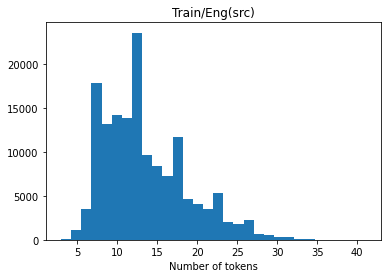

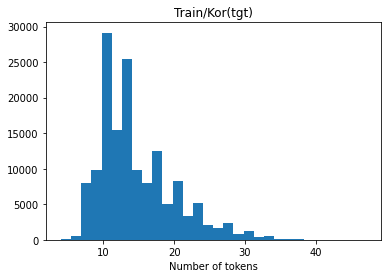

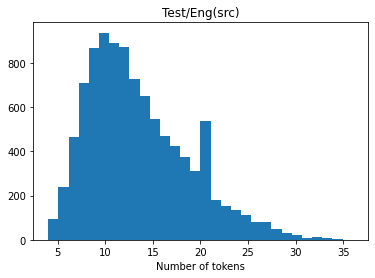

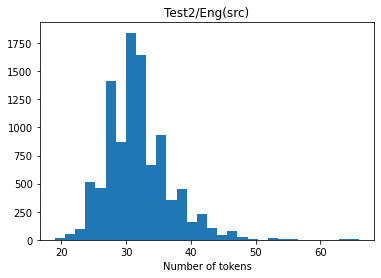

In [ ]:
def draw_length_distribution(tokenized_data:List[List[str]], data_name:str):
  token_num = []
  for el in tokenized_data:
    token_num.append(len(el))
  plt.hist(token_num, bins=30)
  plt.title(data_name)
  plt.xlabel('Number of tokens')
  plt.show()
draw_length_distribution(tokenized_train_src, 'Train/Eng(src)')
draw_length_distribution(tokenized_train_tgt, 'Train/Kor(tgt)')
draw_length_distribution(tokenized_test1_src, 'Test/Eng(src)')
draw_length_distribution(tokenized_test2_src, 'Test2/Eng(src)')


##3. 단어의 빈도수 확인

> 학습 데이터의 단어 개수, 가장 많이 사용된 단어 및 각각의 단어들의 사용 빈도 분포를 확인

Counter({'.': 131118, '▁the': 71421, '▁I': 63522, '▁to': 50405, ',': 39255, 's': 38240, '▁a': 38102, '▁you': 33484, "'": 32819, '▁is': 28197, '▁of': 26929, '▁and': 25916, '▁in': 23511, '?': 18785, '▁for': 16247, '▁it': 15098, '▁that': 14274, 't': 11764, '▁my': 11676, '▁have': 11616, '▁with': 11579, '▁are': 11044, '▁be': 10736, '▁The': 10398, '▁on': 10169, '▁me': 9974, '▁will': 9884, 'ed': 9661, '▁this': 9471, '▁your': 9364, '▁can': 9291, 'ing': 8920, '▁was': 8531, '▁It': 7753, '▁not': 7438, '▁we': 6925, '▁at': 6909, '▁as': 6908, '▁We': 6789, '▁like': 6481, 'm': 5963, '-': 5952, 'd': 5864, '▁so': 5818, '▁do': 5709, '▁from': 5547, '▁': 5481, '▁time': 5256, '▁want': 5006, '▁about': 4987, 'ly': 4975, '▁by': 4921, '▁an': 4767, '▁You': 4492, '▁there': 4468, '▁but': 4458, '▁if': 4429, 'e': 4428, '▁when': 4215, '▁am': 4160, '▁go': 4152, '▁Please': 4104, '▁because': 4032, '▁has': 3826, '▁know': 3805, '▁This': 3768, '▁get': 3690, '▁think': 3585, '▁don': 3522, '▁If': 3521, '▁good': 3401, '▁would'

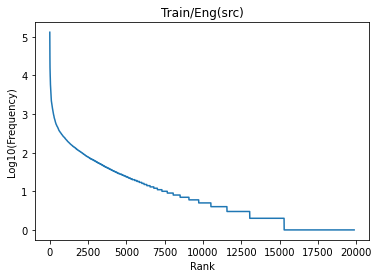

Counter({'.': 131260, '▁': 87872, '을': 36465, '에': 32041, '이': 25174, '를': 22811, '의': 22770, '은': 19834, '가': 19279, '는': 19217, '?': 18792, ',': 16379, '요': 16133, '▁수': 14041, '▁나는': 11676, '▁이': 10834, '▁그': 10777, '고': 10555, '에서': 10364, '지': 9791, '로': 9784, '도': 9429, '한': 9245, '어': 8985, '▁저는': 8836, '해': 8670, '입니다': 8213, '과': 7723, '으로': 7573, '▁당신': 7570, '할': 7452, '▁있습니다': 7319, '게': 7306, '서': 6745, '일': 6387, '어요': 6324, '하고': 6290, '해요': 6227, '와': 5969, '합니다': 5884, '에게': 5855, '▁내': 5852, '기': 5383, '▁것': 5366, '습니다': 5342, '하는': 5300, '▁나': 4846, '▁내가': 4695, '▁있는': 4640, '이에요': 4599, '면': 4598, '▁너': 4494, '▁우리는': 4452, '▁당신은': 4409, '인': 4373, '야': 4358, '주': 4339, '▁거': 4266, '▁한': 4235, '▁주': 4173, '▁당신이': 4113, '▁더': 3979, '▁제가': 3941, '▁가': 3889, '아': 3788, '▁할': 3784, '했어요': 3676, '▁보': 3673, '만': 3663, '▁일': 3659, '▁잘': 3557, '▁때': 3502, '▁저': 3476, '▁있어요': 3355, '했습니다': 3331, '하게': 3327, '▁한국': 3259, '▁안': 3256, '▁우리': 3253, '리': 3235, '하지': 3220, '시': 31

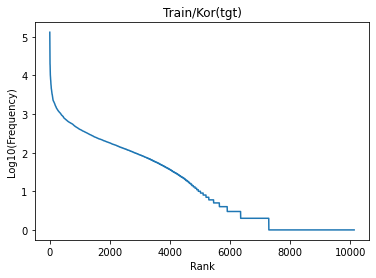

Counter({'.': 8777, '▁the': 4800, '▁I': 4201, '▁to': 3283, '▁a': 2637, ',': 2589, 's': 2472, '▁you': 2326, "'": 2199, '▁is': 1914, '▁of': 1856, '▁and': 1765, '▁in': 1560, '?': 1233, '▁for': 1128, '▁it': 1006, '▁that': 956, 't': 810, '▁my': 795, '▁with': 786, '▁have': 770, '▁are': 711, '▁me': 710, '▁be': 705, '▁on': 690, '▁The': 676, '▁will': 643, '▁can': 636, 'ing': 625, '▁your': 613, 'ed': 600, '▁this': 594, '▁was': 539, '▁It': 528, '▁not': 505, '▁at': 446, '▁as': 441, '▁like': 435, '▁We': 434, '▁we': 425, 'm': 414, '-': 403, '▁from': 393, 'd': 380, '▁so': 368, '▁': 363, '▁time': 351, '▁about': 349, 'ly': 342, '▁do': 338, '▁want': 330, '▁there': 320, '▁an': 313, '▁if': 309, '▁by': 305, '▁Please': 300, 'e': 297, '▁You': 289, '▁because': 281, '▁am': 280, '▁don': 276, '▁but': 276, '▁go': 272, '▁when': 268, '▁know': 262, '▁think': 250, '▁This': 247, '▁has': 239, '▁get': 231, '▁If': 231, '▁good': 229, '▁one': 222, '▁would': 215, '▁all': 202, '▁There': 199, '▁after': 198, '▁who': 198, '▁mor

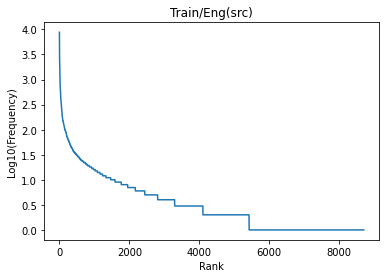

Counter({'▁the': 16766, ',': 10996, '.': 9870, '▁and': 8081, '▁to': 7517, '▁of': 7235, 's': 7139, '▁a': 5493, '▁I': 4496, '▁in': 4332, '▁is': 3960, '▁that': 3147, '▁for': 2459, '▁it': 2397, "'": 2375, '▁you': 2207, '▁with': 2059, 'ing': 2035, 'ed': 1984, '▁be': 1832, '▁on': 1701, '▁as': 1691, '▁are': 1646, '-': 1530, '▁was': 1420, '▁we': 1415, '▁have': 1392, '▁The': 1298, '▁will': 1293, '▁by': 1226, '▁': 1175, '▁can': 1135, '▁from': 1132, 'd': 1128, '▁but': 1088, '▁not': 1062, '▁so': 1029, '▁at': 952, '▁this': 952, 'e': 946, 'ly': 943, '▁an': 933, '▁my': 906, '▁which': 899, 't': 822, '▁or': 804, '▁has': 804, '▁when': 732, '▁because': 714, '▁if': 707, '▁there': 702, '▁who': 692, '▁time': 675, '▁your': 673, '▁they': 623, '▁about': 621, 'tion': 612, 'y': 593, '▁people': 588, '▁like': 574, '▁It': 571, '▁me': 543, '▁more': 524, '▁We': 522, '▁their': 501, '▁after': 490, '▁company': 488, 'es': 486, '▁been': 486, '▁our': 486, '▁In': 482, '▁would': 475, '▁other': 462, '▁through': 455, '▁Korea':

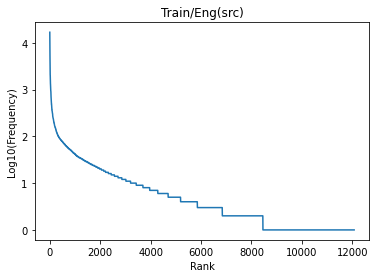

In [ ]:
from collections import Counter
import numpy as np

#Counter함수를 쓰면 
#outcome으로 unique한 단어당 사용된 갯수를 dictionary format으로 printout해준다
def get_token_count(tokenized_data:List[List[str]]):
  counter=Counter()
  for tokenized_sent in tokenized_data:
    counter.update(tokenized_sent)
  print(counter)
  return counter

def draw_token_frequency_distribution(token_counter,title):
  print('='*10)
  print('{}에서 가장 많이 사용된 10개의 단어: {}'.format(title, token_counter.most_common(10)))
  print('{}의 Unique한 토큰 개수: {}'.format(title, len(token_counter)))
  token_frequency = sorted(list(token_counter.values()), reverse=True)
  token_log_frequency = [np.log10(e) for e in token_frequency]
  x_axis = [_ for _ in range(len(token_frequency))]
  plt.plot(x_axis, token_log_frequency)
  plt.title(title)
  plt.xlabel('Rank')
  plt.ylabel('Log10(Frequency)')
  plt.show()

draw_token_frequency_distribution(get_token_count(tokenized_train_src), 'Train/Eng(src)')
draw_token_frequency_distribution(get_token_count(tokenized_train_tgt), 'Train/Kor(tgt)')
draw_token_frequency_distribution(get_token_count(tokenized_test1_src), 'Train/Eng(src)')
draw_token_frequency_distribution(get_token_count(tokenized_test2_src), 'Train/Eng(src)')


##(Original)1. Eng-> Kor 번역 모델 구현

In [ ]:
#Tokenizer/ model 구성

from transformers import BertTokenizer,EncoderDecoderConfig, BertConfig, EncoderDecoderModel, ElectraTokenizer
def get_model_and_tokenizer():
    source_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
    target_tokenizer = ElectraTokenizer.from_pretrained("monologg/koelectra-base-discriminator")
    target_tokenizer.bos_token = target_tokenizer.cls_token
    model = EncoderDecoderModel.from_encoder_decoder_pretrained("bert-base-uncased","monologg/koelectra-base-discriminator")
    return model, source_tokenizer, target_tokenizer
model,source_tokenizer, target_tokenizer = get_model_and_tokenizer()
print(model)

##수정 후-> mBART 모델 tokenizer 와 model 불러오기

##데이터셋 전처리 및 학습 준비

> 1. 학습 데이터를 읽은 뒤, tokenizing(인덱스 변환)

> 2. 배치 단위로 처리하기 위한 collator 함수 정의하기

##Data 읽어 오기

In [ ]:
from matplotlib import pyplot as plt
from typing import List, Tuple, Dict
import pandas as pd

DATAMAP = {'train':'train.csv', 'dev':'dev.csv', 'test1':'test.csv','test2':'test2.csv'}

def read_csv(fname:str)->List[Dict[str,str]]:
  df = pd.read_csv(fname)
  #print(len(df)*0.01)
  #size=int(len(df)*0.1)
  #size=int(len(df)*0.01)
  sid = df['sid'].to_list()
  src = df['en'].to_list() #source가 영어를 의미함
  if 'ko' in df:
    tgt = df['ko'].to_list()
    assert len(sid) == len(src) == len(tgt)
    return {'sid':sid, 'src':src, 'tgt':tgt}
  else:
    assert len(sid) == len(src)
    return {'sid': sid, 'src': src}

f_path='/content/drive/MyDrive/01.NLP_class/project3_NMT/data/'
train_data = read_csv(f_path+DATAMAP['train'])
dev_data = read_csv(f_path+DATAMAP['dev'])
test1_data = read_csv(f_path+DATAMAP['test1'])
test2_data = read_csv(f_path+DATAMAP['test2'])

print(f"학습 데이터 개수: {len(train_data['sid'])}")
print(f"검증 데이터 개수: {len(dev_data['sid'])}")
print(f" 첫번째 평가 데이터 개수: {len(test1_data['sid'])}")
print(f"두 번째 평가 데이터 개수: {len(test2_data['sid'])}")

학습 데이터 개수: 150000
검증 데이터 개수: 10000
 첫번째 평가 데이터 개수: 10000
두 번째 평가 데이터 개수: 10000


In [ ]:
#check
print(dev_data['src'])
print(dev_data['tgt'])

['Match up with Hello Carbot Megabold versus Metron K Cops.', 'Mr.Park sends his regards.', 'I wrote a story to become an editor.', "That's not what I'm thinking.", 'Who will you give the food?', "You must be glad you're white.", 'Kibum uses standard language as if he is from Seoul.', 'We paid 30,000 won for the item.', "I'm Korean but I studied abroad in Japan.", 'And I saw that you adore her a lot.', 'But you should request to send PayPal invoice on the Q&A.', 'Change means the substitution between the structure and function of the mosaic.', 'Can we bring this meeting to a close?', 'Nothing happy has happened to me yet.', "Taeho and I hung out all the time together and I've never seen him studying.", 'They found a gun and it was discharged, hurting Patrick.', 'Please be cautious of identity theft.', 'Summer is also a nice season but I thought the snowing season since Korean temperature now is over 35degrees.', 'We limit people who are picky about food due to religion.', 'Our departme